<a href="https://colab.research.google.com/github/shardajadhav03/eye_disease_prediction/blob/main/Eye_disease_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification

['Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification',
 'License(s): ODbL-1.0',
 'Downloading eye-diseases-classification.zip to /content',
 '',
 '  0% 0.00/736M [00:00<?, ?B/s]',
 '  1% 6.00M/736M [00:00<00:12, 60.2MB/s]',
 '  2% 12.0M/736M [00:00<00:16, 46.2MB/s]',
 '  2% 18.0M/736M [00:00<00:14, 50.9MB/s]',
 '  4% 30.0M/736M [00:00<00:09, 75.7MB/s]',
 '  6% 42.0M/736M [00:00<00:08, 89.8MB/s]',
 '  7% 51.0M/736M [00:00<00:08, 83.1MB/s]',
 '  9% 66.0M/736M [00:00<00:06, 104MB/s] ',
 ' 11% 82.0M/736M [00:00<00:05, 120MB/s]',
 ' 13% 98.0M/736M [00:01<00:04, 134MB/s]',
 ' 15% 112M/736M [00:01<00:05, 129MB/s] ',
 ' 18% 129M/736M [00:01<00:05, 119MB/s]',
 ' 20% 147M/736M [00:01<00:04, 135MB/s]',
 ' 22% 161M/736M [00:01<00:05, 120MB/s]',
 ' 25% 182M/736M [00:01<00:04, 144MB/s]',
 ' 27% 198M/736M [00:01<00:03, 150MB/s]',
 ' 29% 216M/736M [00:01<00:03, 160MB/s]',
 ' 32% 233M/736M [00:01<00:03, 165MB/s]',
 ' 35% 254M/736M [00:02<00:02, 180MB/s]',
 ' 38% 28

In [3]:
import zipfile
with zipfile.ZipFile('/content/eye-diseases-classification.zip', 'r') as zip_ref:
    zip_ref.extractall('eye-diseases-val')

In [4]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected import statement
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_eye = os.listdir('/content/eye-diseases-val/dataset')
print("Types of eye diseases found: ", len(train_eye))
print(train_eye)

Types of eye diseases found:  4
['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract']


In [6]:
eye_dir = '/content/eye-diseases-val/dataset'

In [7]:
batch_size = 32
img_height = 224
img_width = 224

In [8]:
eye_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    eye_dir,
    validation_split=0.2,
    subset='training',
    seed=111,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

eye_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    eye_dir,
    validation_split=0.2,
    subset='validation',
    seed=111,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4217 files belonging to 4 classes.
Using 3374 files for training.
Found 4217 files belonging to 4 classes.
Using 843 files for validation.


In [9]:
input_shape=(224,224,3)
batch_size=64
classes=4

In [10]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [11]:
dense = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
for layer in dense.layers[:121]:
    layer.trainable = False

In [13]:
model = Sequential()
model.add(dense)
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "sigmoid"))

In [14]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
patience = 1
stop_patience = 3
factor = 0.5

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("densenet121.keras", save_best_only=True, verbose = 0), # saves the model with the best validation loss
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1)]


In [17]:
history = model.fit(eye_train_ds, validation_data = eye_val_ds, epochs = 15, verbose = 1, callbacks = callbacks)

Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.5354 - loss: 2.9135 - val_accuracy: 0.4294 - val_loss: 14.8884 - learning_rate: 0.0010
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.7859 - loss: 0.7300
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
106/106 ━━━━━━━━━━━━━━━━━━━━ 69s 260ms/step - accuracy: 0.7860 - loss: 0.7296 - val_accuracy: 0.6133 - val_loss: 30.7913 - learning_rate: 0.0010
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 42s 276ms/step - accuracy: 0.8453 - loss: 0.4185 - val_accuracy: 0.8434 - val_loss: 0.7221 - learning_rate: 5.0000e-04
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 28s 265ms/step - accuracy: 0.8964 - loss: 0.3146 - val_accuracy: 0.8636 - val_loss: 0.5258 - learning_rate: 5.0000e-04
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8951 - loss: 0.3089
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
106/106 ━━━━━━━━━━━━━━━━━━━━ 40s 251ms/step - accuracy:

In [18]:
val_loss, val_accuracy = model.evaluate(eye_val_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.9192 - loss: 0.3538
Validation Accuracy: 92.88%


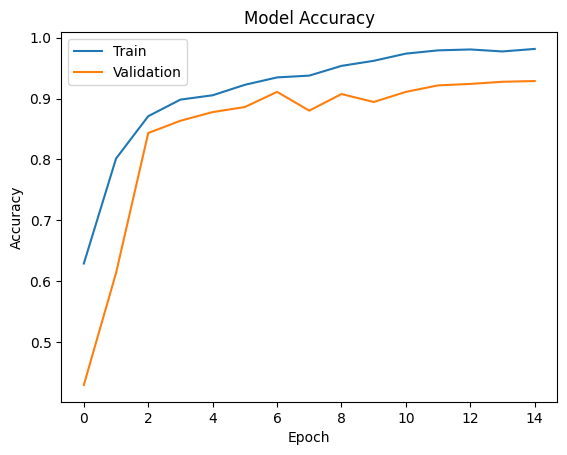

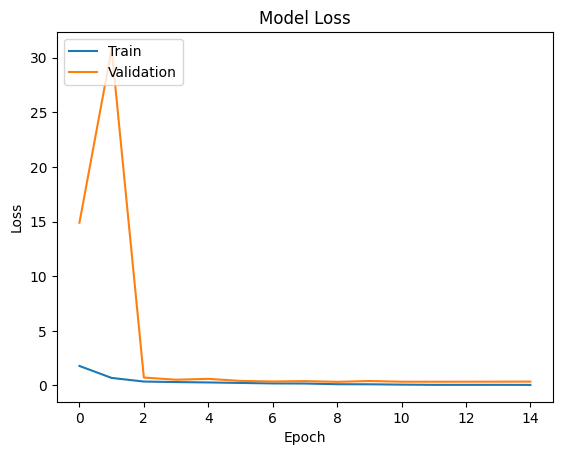

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
performance = model.evaluate(eye_val_ds)
print('Test Loss:  ', performance[0])
print('Test Accuracy:  ', performance[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.9247 - loss: 0.3957
Test Loss:   0.3542647659778595
Test Accuracy:   0.9288256168365479


In [22]:
label = eye_train_ds.class_names
label

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

First image to predict
Actual label: cataract
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted label: cataract



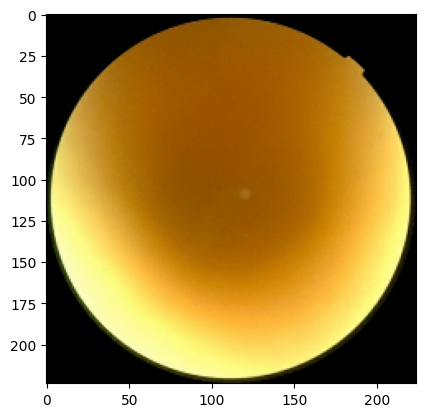

In [23]:
for image_batch, labels_batch in eye_val_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", label[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", label[np.argmax(batch_prediction[0])])
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


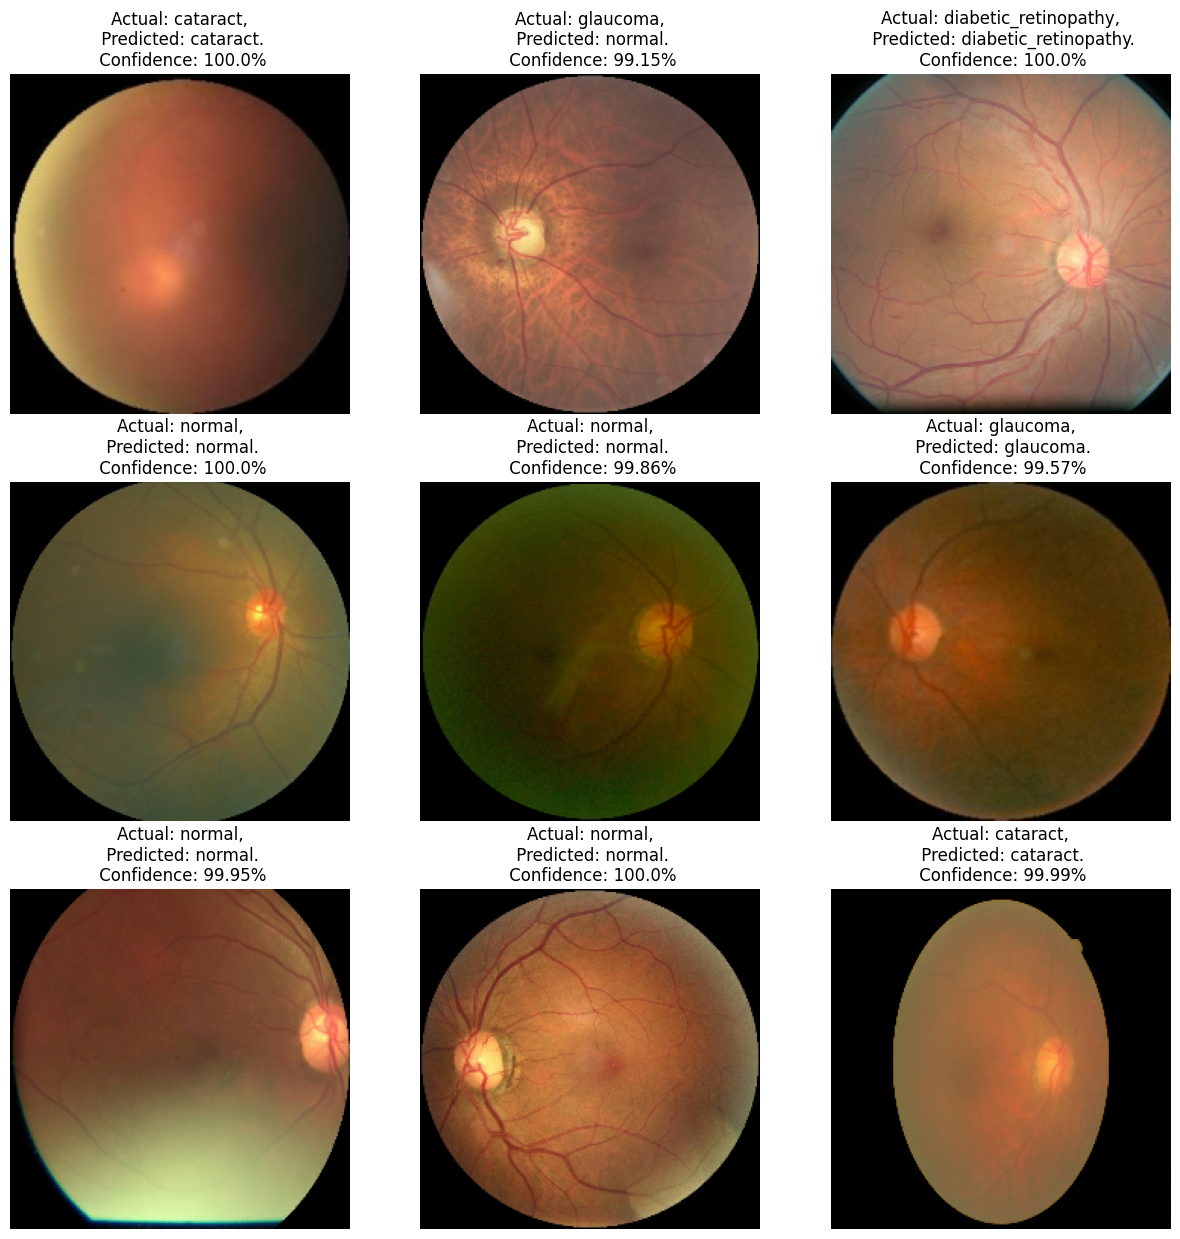

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = label[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


plt.figure(figsize=(15, 15))
for images, labels in eye_val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = label[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
